In [5]:
!ls

bin					   etc	  opt	 sys
boot					   home   proc	 tensorflow-1.15.2
content					   lib	  root	 tmp
datalab					   lib32  run	 tools
dev					   lib64  sbin	 usr
dlib-19.18.0-cp27-cp27mu-linux_x86_64.whl  media  srv	 var
dlib-19.18.0-cp36-cp36m-linux_x86_64.whl   mnt	  swift


In [6]:
%cd /content/number_letnet/

/content/number_letnet


In [7]:
# -*- coding: utf-8 -*-
'''
Convolutional Neural Network
'''

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
#from keras.layers import Dropout
from keras import backend as K


class LeNet:
    @staticmethod
    def build(input_shape_width, input_shape_height, classes, 
              weight_path = '', input_shape_depth = 3):
        '''
        weight_path: a .hdf5 file. If exists, we can load model.
        '''
        
        # initialize the model
        model = Sequential()
        
        input_shape = (input_shape_height, input_shape_width, 
                       input_shape_depth)
        # if we are using "channels first", update the input shape
        if K.image_data_format() == 'channels_first':
             input_shape = (input_shape_depth, input_shape_height, 
                            input_shape_width)
        
        # first Convolution + relu + pooling layer
        model.add(Conv2D(filters = 20, kernel_size = (5, 5), 
                         padding = 'same', input_shape = input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size = (2, 2), strides=(2, 2)))
        
        # second convolutional layer
        model.add(Conv2D(filters = 50, kernel_size = (5, 5), 
                         padding = 'same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        # Flattening
        model.add(Flatten())
        
        # Full connection
        model.add(Dense(units = 500))
        model.add(Activation('relu'))
        
        # output layer
        model.add(Dense(units = classes))
        model.add(Activation('softmax'))
        
        if weight_path:
            model.load_weights(weight_path)
            
        # return the constructed network architecture
        return model
      


Using TensorFlow backend.


[INFO] 下载数据集...
11493376/11490434 [==============================] - 2s 0us/step
[INFO] 编译模型...
[INFO] 训练模型...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 190us/step - loss: 1.0392 - accuracy: 0.7292 - val_loss: 0.3121 - val_accuracy: 0.9132
Epoch 2/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.2502 - accuracy: 0.9256 - val_loss: 0.2215 - val_accuracy: 0.9336
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1782 - accuracy: 0.9463 - val_loss: 0.1396 - val_accuracy: 0.9590
Epoch 4/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1395 - accuracy: 0.9586 - val_loss: 0.1127 - val_accuracy: 0.9666
Epoch 5/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1157 - accuracy: 0.9661 - val_loss: 0.0990 - val_accuracy: 0.9725
Epoch 6/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0995 - accuracy: 0.97

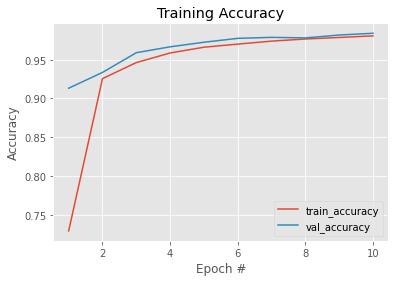

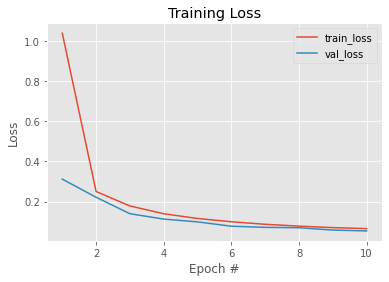

In [8]:
# -*- coding: utf-8 -*-
'''
train mnist    
测试
image is grayscale with 28*28 size.
'''

# 导入包
# from lenet import LeNet
from keras.datasets import mnist
from keras.optimizers import SGD
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 全局常量
LR = 0.01
BATCH_SIZE = 128
EPOCHS = 10

# 全局变量
accuracy_plot_path = 'plots/accuracy.png'
loss_plot_path = 'plots/loss.png'
output_model_path = 'models/mnist.hdf5'

################################################
# 第一部分：数据预处理
# grab the MNIST dataset
print('[INFO] 下载数据集...')
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# matrix shape should be: num_samples x rows x columns x depth
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

# scale data to the range of [0,1]
trainData = trainData.astype('float32') / 255.0
testData = testData.astype('float32') / 255.0

# transform the training and testing labels into vectors 
#in the range [0, classes]
trainLabels = np_utils.to_categorical(trainLabels, 10)
testLabels = np_utils.to_categorical(testLabels, 10)


################################################3
# 第二部分：创建并训练模型
# initialize the optimizer and model
print('[INFO] 编译模型...')
opt = SGD(lr = LR)
model = LeNet.build(28,28,10,'',1)
model.compile(loss = 'categorical_crossentropy', 
              optimizer=opt, metrics = ['accuracy'])

# train model
print('[INFO] 训练模型...')
H = model.fit(trainData, trainLabels, 
              validation_data=(testData, testLabels),
              batch_size = BATCH_SIZE, epochs = EPOCHS, verbose = 1)


################################################
# 第三部分：评估模型

# 画出accuracy曲线
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1, EPOCHS+1), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(1, EPOCHS+1), H.history["val_accuracy"],label="val_accuracy")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(accuracy_plot_path)

# 画出loss曲线
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(1,EPOCHS+1),H.history["loss"], label="train_loss")
plt.plot(np.arange(1,EPOCHS+1),H.history["val_loss"],label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig(loss_plot_path)

# 打印分类报告
# show accuracy on the testing set
print('[INFO] 评估模型...')
predictions = model.predict(testData, batch_size=32)
print(classification_report(testLabels.argmax(axis=1),
	                        predictions.argmax(axis=1), 
                            target_names=[str(i) for i in range(10)]))


################################################
# 第四部分：保存模型
model.save(output_model_path)


[INFO] 下载数据集...
[INFO] Predicted: 1, Actual:1


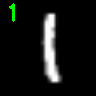

[INFO] Predicted: 0, Actual:0


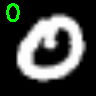

[INFO] Predicted: 1, Actual:1


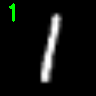

[INFO] Predicted: 3, Actual:3


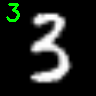

[INFO] Predicted: 6, Actual:6


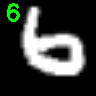

In [15]:
# -*- coding: utf-8 -*-
'''
test mnist
'''

# import necessary libraries
import numpy as np
import cv2
from keras.models import load_model
from keras.datasets import mnist
from google.colab.patches import cv2_imshow

# global variables
model_path = 'models/mnist.hdf5'


model = load_model(model_path)

# grab the MNIST dataset
print('[INFO] 下载数据集...')
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# matrix shape should be: num_samples x rows x columns x depth
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

# randomly select a few testing digits
for i in np.random.choice(np.arange(0, len(testLabels)), size = (5,)):
    # classify the digit
    probs = model.predict(testData[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    
    # extract the image from the testData
    #image = (testData[i] * 255).astype('uint8')
    
    # merge the channels into one image, i.e. let the image 
    #has 3 channels, otherwise our colorful predicted number 
    #won't appear
    image = cv2.merge([testData[i]] * 3)
    
    # resize the image from 28x28 to a 96x96 image so that we can 
    #better see it
    image = cv2.resize(image, (96,96), interpolation=cv2.INTER_LINEAR)
    
    # show the image and prediction
    cv2.putText(image, str(prediction[0]), (5,20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0,255,0), 2)
    
    print('[INFO] Predicted: {}, Actual:{}'.format(prediction[0], testLabels[i]))
    cv2_imshow(image)